In [ ]:
#Analisis exploratorio trocafone - Bárbara

In [2]:
import numpy as np 
import pandas as pd

# plots
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

df = pd.read_csv('/home/barbara/Documentos/datos/tarea/fiuba-trocafone-tp1-final-set/events.csv')

/home/barbara/.local/lib/python2.7/site-packages/IPython/core/interactiveshell.py:2714: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
len(df)

1011288

In [5]:
df.sample(1)

,timestamp,event,person,url,sku,model,condition,storage,color,skus,...,search_engine,channel,new_vs_returning,city,region,country,device_type,screen_resolution,operating_system_version,browser_version
575223,2018-06-14 02:20:21,checkout,9339f2d1,NaN,2710,iPhone 5,Bom,16GB,Branco,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
df.dtypes

timestamp                   object
event                       object
person                      object
url                         object
sku                         object
model                       object
condition                   object
storage                     object
color                       object
skus                        object
search_term                 object
staticpage                  object
campaign_source             object
search_engine               object
channel                     object
new_vs_returning            object
city                        object
region                      object
country                     object
device_type                 object
screen_resolution           object
operating_system_version    object
browser_version             object
dtype: object

In [ ]:
#Limpiamos los datos

In [3]:
# Le agregamos 3 columnas, una de año, otra de dia de la semana y otra de hora.
import calendar
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['Year'] = df['timestamp'].map(lambda x:x.year)
df['Weekday'] = df['timestamp'].map(lambda x:x.weekday_name)
df['Hour'] = pd.to_datetime(df['timestamp'], format='%H:%M',errors='coerce').dt.hour




/home/barbara/.local/lib/python2.7/site-packages/ipykernel_launcher.py:5: FutureWarning: `weekday_name` is deprecated and will be removed in a future version. Use `day_name` instead
  """


In [35]:
df.dtypes


timestamp                   datetime64[ns]
event                               object
person                              object
url                                 object
sku                                 object
model                               object
condition                           object
storage                             object
color                               object
skus                                object
search_term                         object
staticpage                          object
campaign_source                     object
search_engine                       object
channel                             object
new_vs_returning                    object
city                                object
region                              object
country                             object
device_type                         object
screen_resolution                   object
operating_system_version            object
browser_version                     object
Year       

Text(0,0.5,'Eventos')

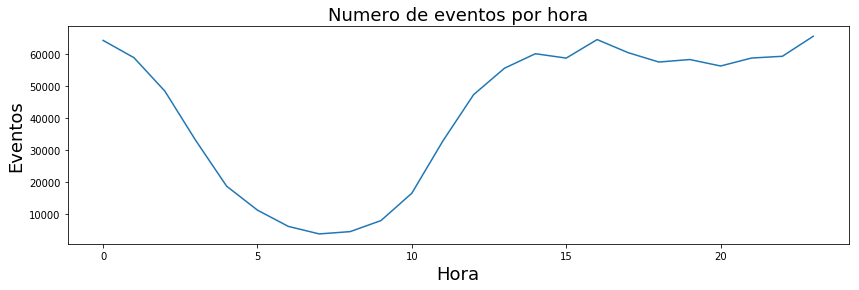

In [14]:
# Numero de eventos por hora
plotEH = df.groupby('Hour').count()['event'].plot(figsize=(14,4));

plotEH.set_title("Numero de eventos por hora", fontsize=18)
plotEH.set_xlabel("Hora",fontsize=18)
plotEH.set_ylabel("Eventos", fontsize=18)


Text(0,0.5,'Eventos')

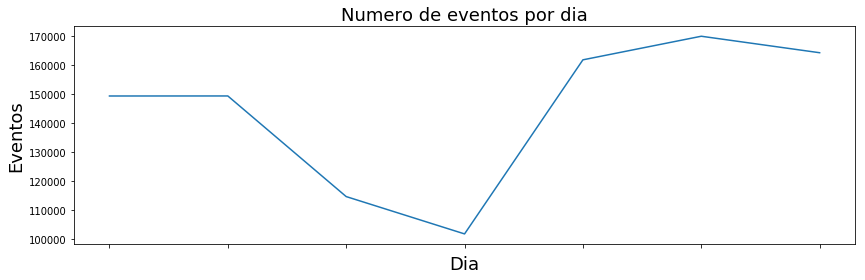

In [15]:
# Numero de eventos por dia
# Hay que agregarle los dias de la semana ¿Como?
plotED=df.groupby('Weekday').count()['event'].plot(figsize=(14,4));

plotED.set_title("Numero de eventos por dia", fontsize=18)
plotED.set_xlabel("Dia",fontsize=18)
plotED.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

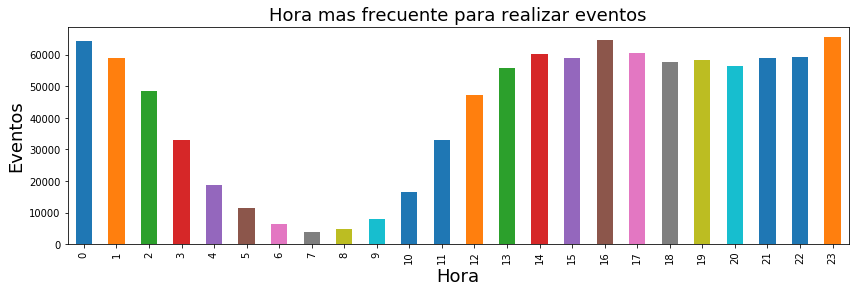

In [17]:
#Hora mas comun para entrar al site y generar eventos
plotH=df['Hour'].value_counts().sort_index().plot(kind='bar',figsize=(14,4));
plotH.set_title("Hora mas frecuente para realizar eventos", fontsize=18)
plotH.set_xlabel("Hora",fontsize=18)
plotH.set_ylabel("Eventos", fontsize=18)


Text(0,0.5,'Eventos')

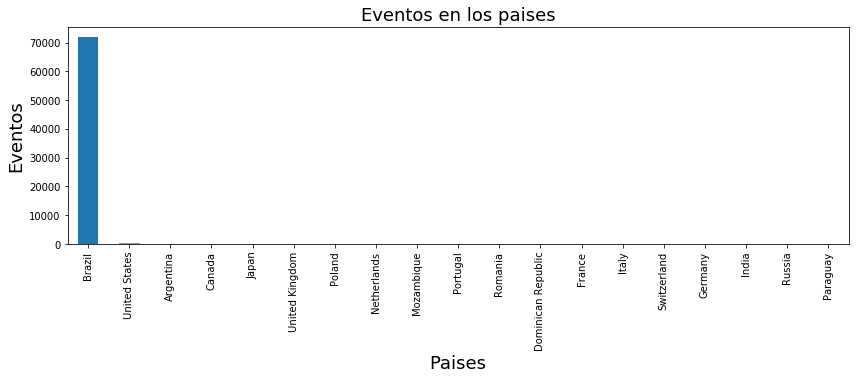

In [32]:
#paises y eventos
dfFiltrado = df.loc[df['region'] != 'Unknown', :]
plotC=dfFiltrado['country'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotC.set_title("Eventos en los paises", fontsize=18)
plotC.set_xlabel("Paises",fontsize=18)
plotC.set_ylabel("Eventos", fontsize=18)



Text(0,0.5,'Eventos')

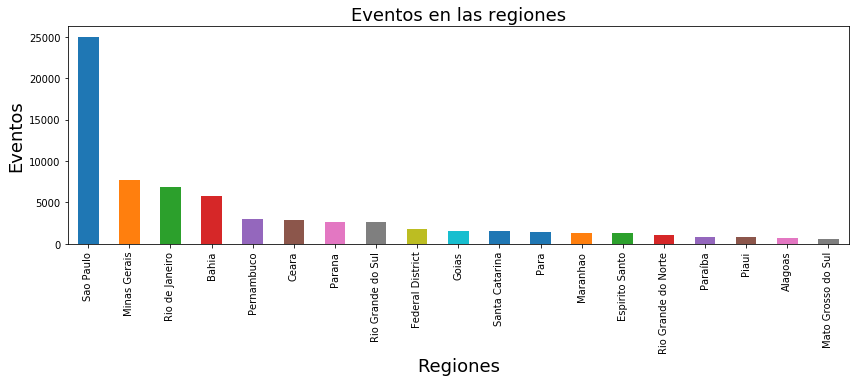

In [30]:
#regiones y eventos
dfFiltrado = df.loc[df['region'] != 'Unknown', :]
plotR=dfFiltrado['region'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotR.set_title("Eventos en las regiones", fontsize=18)
plotR.set_xlabel("Regiones",fontsize=18)
plotR.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Eventos')

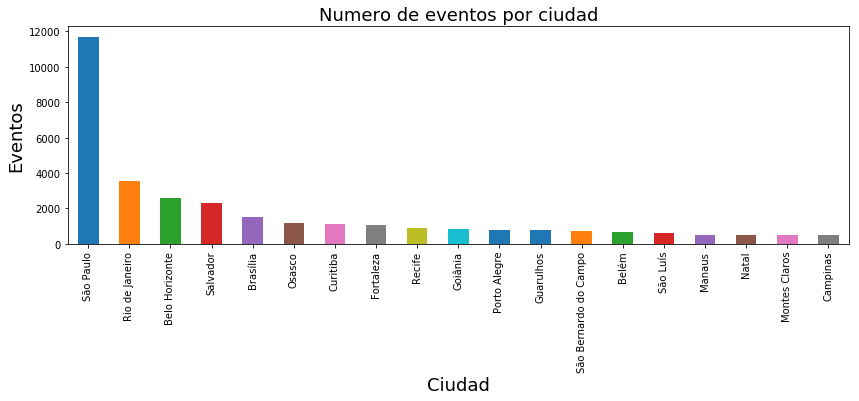

In [18]:
#ciudades y eventos
dfFiltrado = df.loc[df['city'] != 'Unknown', :]
plotF=dfFiltrado['city'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));

plotF.set_title("Numero de eventos por ciudad", fontsize=18)
plotF.set_xlabel("Ciudad",fontsize=18)
plotF.set_ylabel("Eventos", fontsize=18)

Text(0,0.5,'Compra')

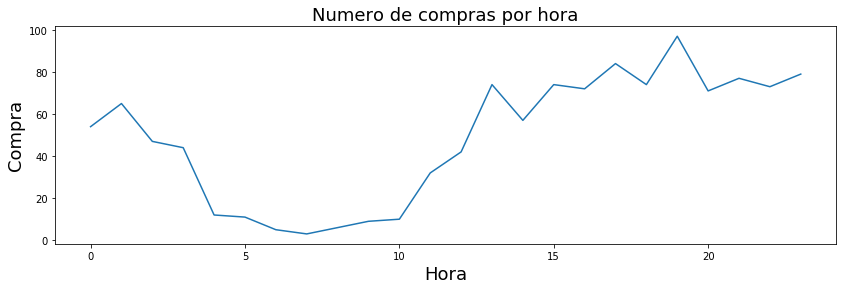

In [9]:
compras = df.loc[df.event.str.contains('conversion'),:]
plotH=compras.groupby('Hour').count()['event'].plot(figsize=(14,4));
#numero de compras por hora
plotH.set_title("Numero de compras por hora", fontsize=18)
plotH.set_xlabel("Hora",fontsize=18)
plotH.set_ylabel("Compra", fontsize=18)

Text(0,0.5,'Compras')

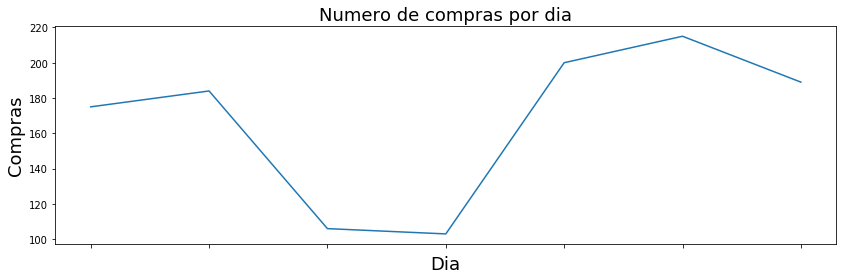

In [10]:
plotD=compras.groupby('Weekday').count()['event'].plot(figsize=(14,4));
plotD.set_title("Numero de compras por dia", fontsize=18)
plotD.set_xlabel("Dia",fontsize=18)
plotD.set_ylabel("Compras", fontsize=18)
#numero de compras por dia de la semana

Text(0,0.5,'Cantidad de eventos')

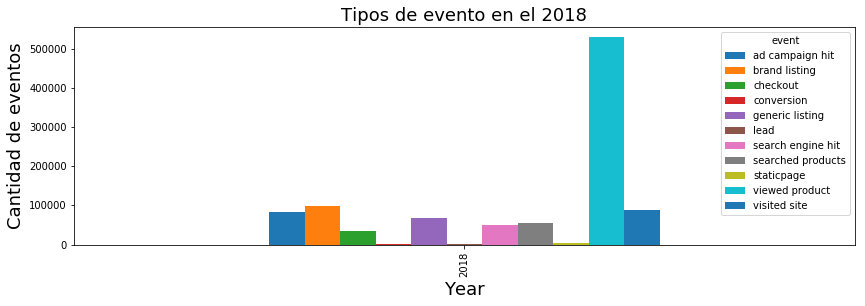

In [29]:
#Analisis por año de los diferentes eventos

# tipo de eventos por año (2018)...

plot=pd.crosstab(df.Year, df.event).plot(kind='bar',figsize=(14,4));
plot.set_title("Tipos de evento en el 2018", fontsize=18)
plot.set_xlabel("Year",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)




Text(0,0.5,'Cantidad de eventos')

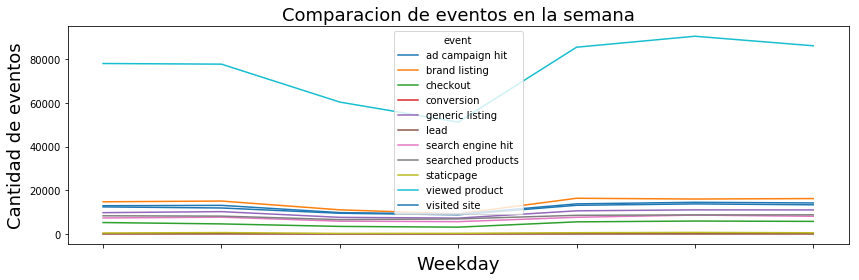

In [5]:
plot=pd.crosstab(df.Weekday, df.event).plot(figsize=(14,4));
plot.set_title("Comparacion de eventos en la semana", fontsize=18)
plot.set_xlabel("Weekday",fontsize=18)
plot.set_ylabel("Cantidad de eventos", fontsize=18)

Text(0,0.5,'Cantidad de eventos')

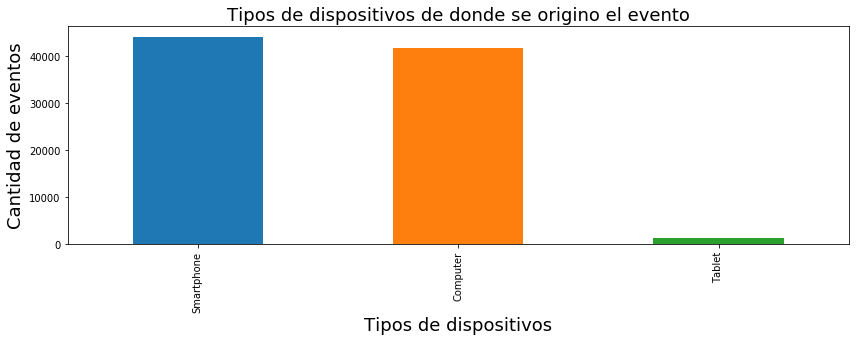

In [21]:
# tipos de dispositivos de donde se origino el evento

dfFiltrado = df.loc[df['device_type'] != 'NaN', :]
dfFiltrado = df.loc[df['device_type'] != 'Unknown', :]

plotCEL=dfFiltrado['device_type'].value_counts()[0:19].plot(kind='bar',figsize=(14,4));
plotCEL.set_title("Tipos de dispositivos de donde se origino el evento", fontsize=18)
plotCEL.set_xlabel("Tipos de dispositivos",fontsize=18)
plotCEL.set_ylabel("Cantidad de eventos", fontsize=18)
